# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [50]:
import warnings
warnings.simplefilter('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [6]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.columns=[e.lower().replace(' ', '_') for e in fitbit.columns]
fitbit.head()



,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [10]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        367 non-null    object 
 1   calorie_burned              367 non-null    int64  
 2   steps                       367 non-null    int64  
 3   distance                    367 non-null    float64
 4   floors                      367 non-null    int64  
 5   minutes_sedentary           367 non-null    float64
 6   minutes_lightly_active      367 non-null    int64  
 7   minutes_fairly_active       367 non-null    int64  
 8   minutes_very_active         367 non-null    int64  
 9   activity_calories           367 non-null    int64  
 10  minutesofsleep              367 non-null    int64  
 11  minutesofbeingawake         367 non-null    int64  
 12  numberofawakings            367 non-null    int64  
 13  lengthofrestinminutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

____

 Cómo cambia el número promedio de pasos por mes. 
 Use la visualización adecuada para mostrar los pasos medios por mes. 
 ¿Fitbitter es más activo los fines de semana o días laborables? 
 **Sugerencias **: 
 * Use las columnas Months_encoded y Week_or Weekend. 
 * Use la API orientada a objetos matplolib.pyplot. 
 * Establezca su cifra de tamaño en 12,4 
 * Explore plt.sca 
 * Explore plt.xticks 
 * Guarde sus cifras en una carpeta llamada 'figuras' en su repositorio.

In [40]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit.groupby(['months_encoded']).steps.mean()

months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: steps, dtype: float64

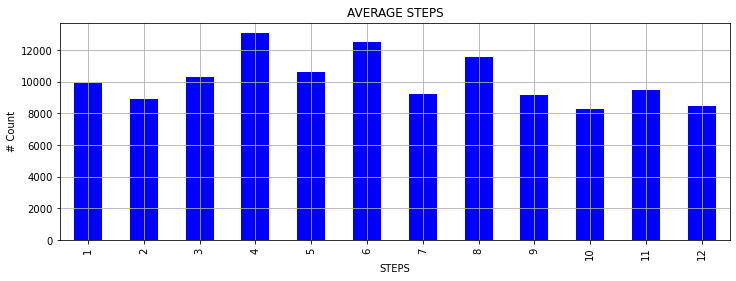

In [47]:
ax=fitbit.groupby(['months_encoded']).mean().steps.plot(
        
        kind='bar',
        color=['b'],
        grid=True,
        figsize=(12, 4),
        title='AVERAGE STEPS'
)

ax.set_xlabel('STEPS')
ax.set_ylabel('# Count')

plt.show();

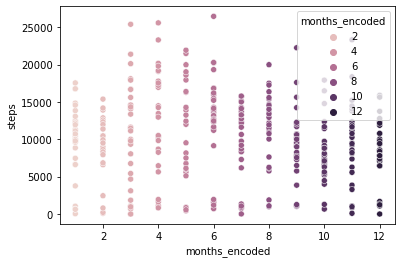

In [52]:
sns.scatterplot(data=fitbit, 
                hue='months_encoded',
                x='months_encoded', 
                y='steps');

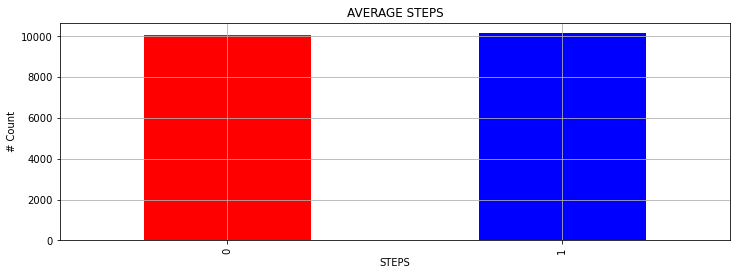

In [68]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

ax=fitbit.groupby(['work_or_weekend']).steps.mean().plot(
        
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 4),
        title='AVERAGE STEPS'
)

ax.set_xlabel('STEPS')
ax.set_ylabel('# Count')

plt.gcf()

plt.savefig("../figures/Steps_WORK_OR_WEEKEND.png");

In [54]:
fitbit.groupby(['work_or_weekend']).steps.mean()

work_or_weekend
0    10064.238095
1    10144.572519
Name: steps, dtype: float64

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

_____

 #### Escriba un bucle para trazar 3 diagramas de dispersión de las siguientes características: 
 * Minutos ligeramente activos vs pasos 
 * Minutos muy activos vs pasos 
 * Minutos sedentarios vs pasos
 
minutes_sedentary
minutes_lightly_active
minutes_very_active

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


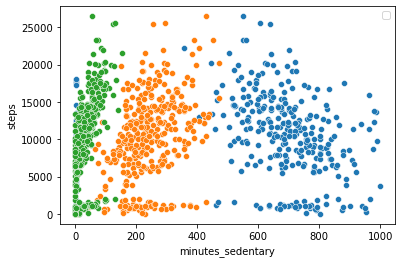

In [112]:

serie = [fitbit.minutes_sedentary, fitbit.minutes_lightly_active, fitbit.minutes_very_active]

for e in serie:
    sns.scatterplot(data=fitbit, 
                x=e, 
                y=fitbit.steps);
plt.legend()
plt.show()
       

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [29]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.columns=[e.lower().replace(' ', '_') for e in titanic.columns]
titanic.head()


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [30]:
# your code here

titanic.dtypes

passengerid      int64
survived       float64
pclass           int64
name            object
gender          object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

 #### Cuáles son sus variables numéricas? ¿Cuáles son tus variables categóricas? **Sugerencia **: Use Pandas select_dtypes.

In [31]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=np.number)

NameError: name 'np' is not defined

In [32]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=np.object)

NameError: name 'np' is not defined

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

 #### Establezca el estilo de trama en clásico y el tamaño de figura en ( 12,6 ). **Sugerencia **: para establecer el estilo, puede usar las funciones matplotlib o seaborn. Investigue un poco sobre el asunto.

In [33]:
plt.style.use('classic')
plt.rcParams['figure.figsize']=(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

 Use la visulalización correcta para mostrar la distribución de la columna `Edad`.

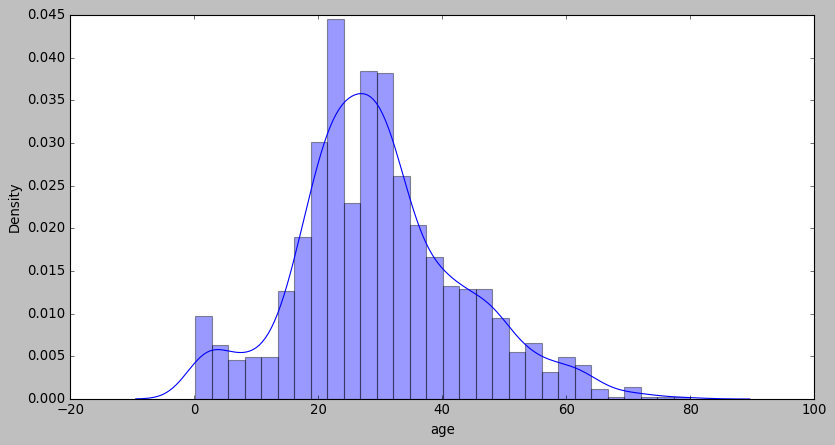

In [34]:
sns.distplot(titanic.age);


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

 #### Use subtramas y trace la distribución de la `Edad` con contenedores iguales a 10, 20 y 50.

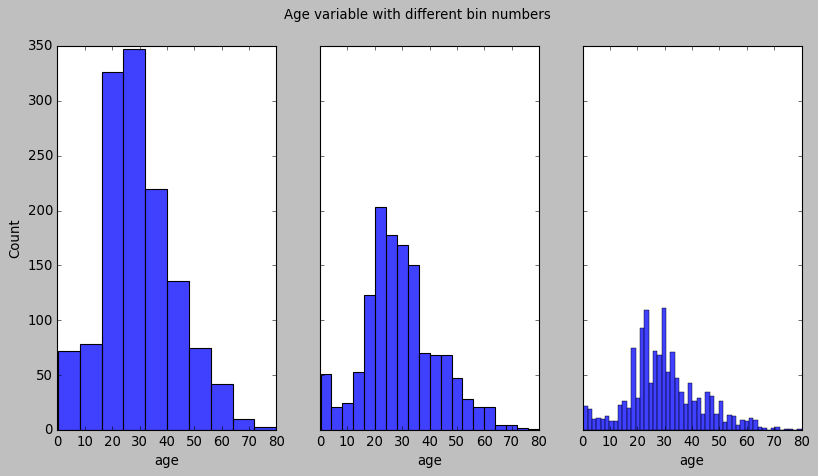

In [35]:
fig, axes = plt.subplots(1,3, figsize=(12, 6), sharey=True)
fig.suptitle('Age variable with different bin numbers')
cats=[10, 20, 50]

for i, cat in enumerate(cats):
    sns.histplot(ax=axes[i], data=titanic['age'], bins=cat)


#### How does the bin size affect your plot?

In [36]:
"""
cuanto mas grande sea el bins, 
mas distribuye las columnas, 
por lo que salen menos unidades por columna

"""

'\ncuanto mas grande sea el bins, \nmas distribuye las columnas, \npor lo que salen menos unidades por columna\n\n'

#### Use seaborn to show the distribution of column `Age`.

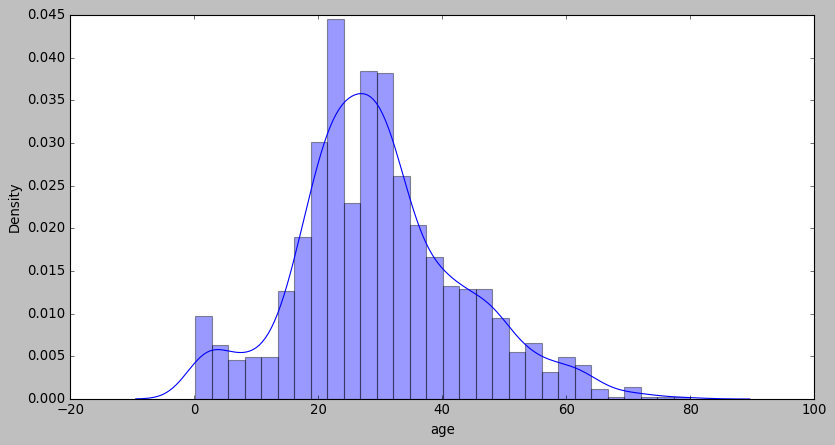

In [37]:
sns.distplot(titanic.age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

 #### Use la trama correcta para visualizar la columna `Género`. Hay 2 formas de hacerlo. Hazlo en ambos sentidos. **Sugerencia **: Use matplotlib y seaborn.

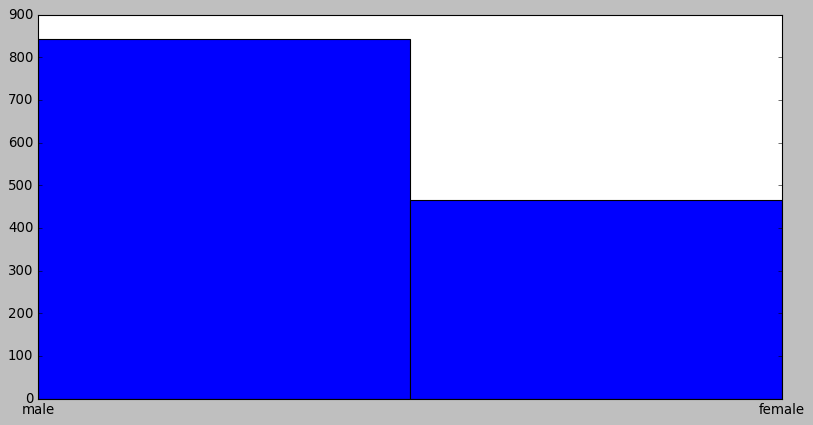

In [38]:
# Method 1 - matplotlib
plt.hist(titanic.gender, bins=2);

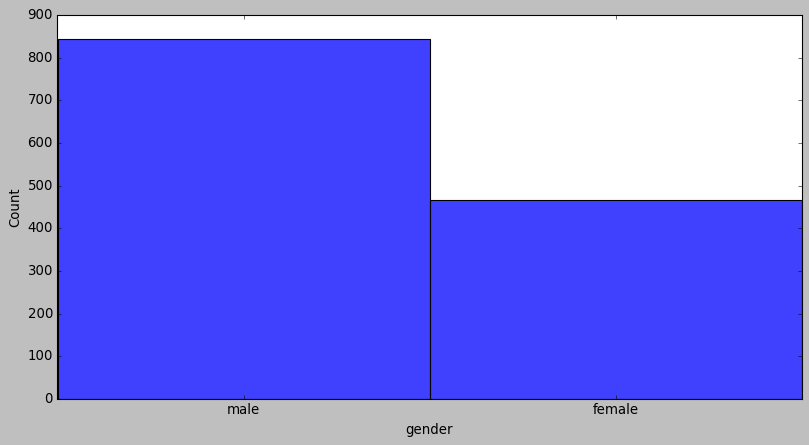

In [39]:
# Method 2 - seaborn
sns.histplot(data=titanic['gender']);

#### Use the right plot to visualize the column `Pclass`.

 #### Use la trama correcta para visualizar la columna `Pclass`.

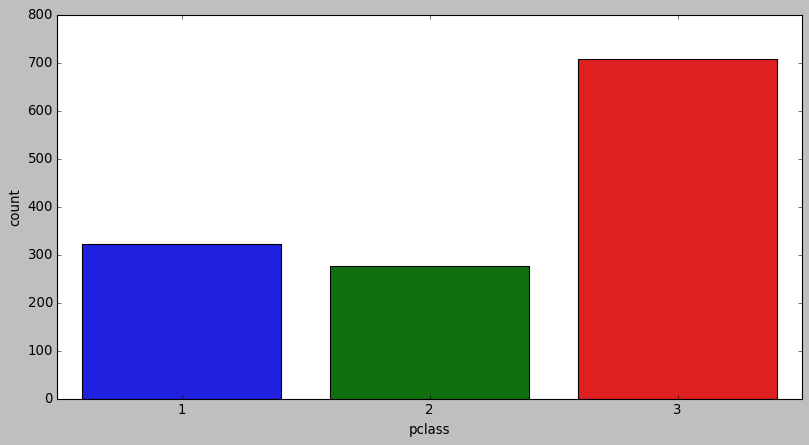

In [40]:
sns.countplot(x=titanic.pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

 #### Nos gustaría tener en un solo diagrama las estadísticas resumidas de la característica `Age`. ¿Qué tipo de trama usarías? Trazarlo.

In [41]:
describe = titanic.age.describe()
describe.T

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: age, dtype: float64

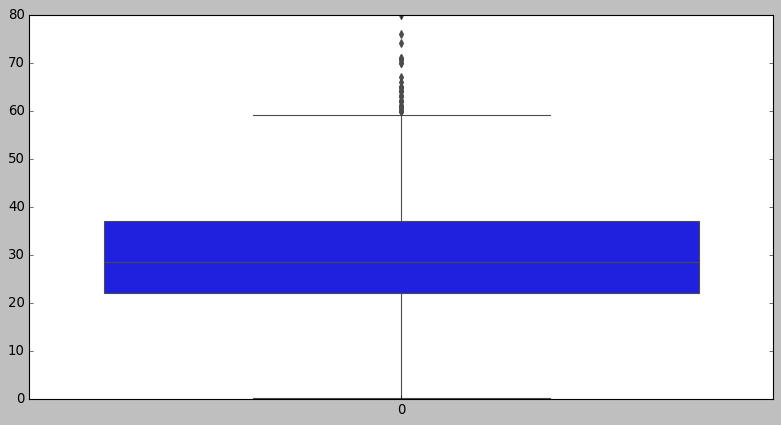

In [42]:
sns.boxplot(data=titanic.age);

In [43]:
"""
en el boxplot podemos ver toda la información de mediana, percentiles...
"""

'\nen el boxplot podemos ver toda la información de mediana, percentiles...\n'

#### What does the last plot tell you about the feature `Age`?

In [44]:
"""
your comments here
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

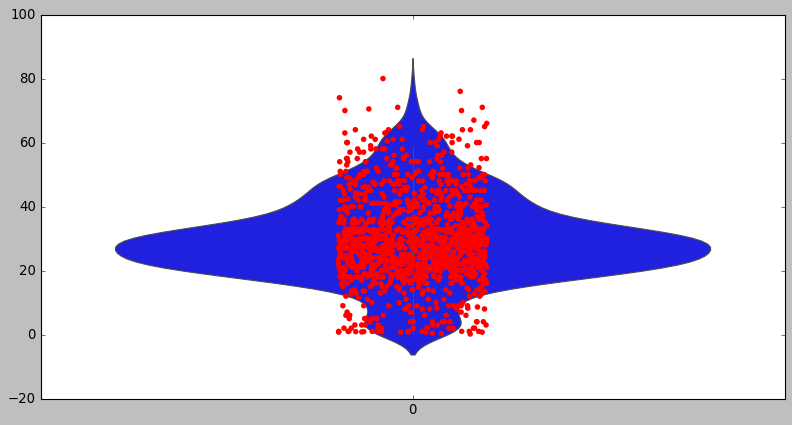

In [45]:
sns.violinplot(data=titanic['age'])
sns.stripplot(data=titanic['age'], color='red')

#### What additional information does the last plot provide about feature `Age`?

In [46]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

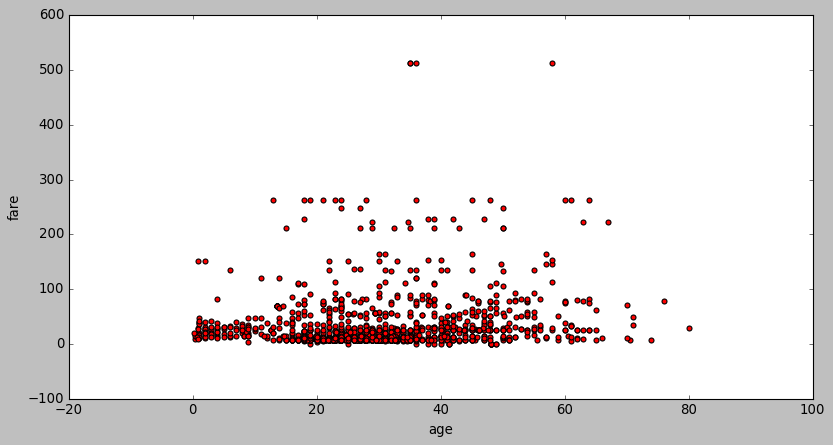

In [47]:
# Method 1 - matplotlib
titanic.plot.scatter(x='age', y='fare', color='red');

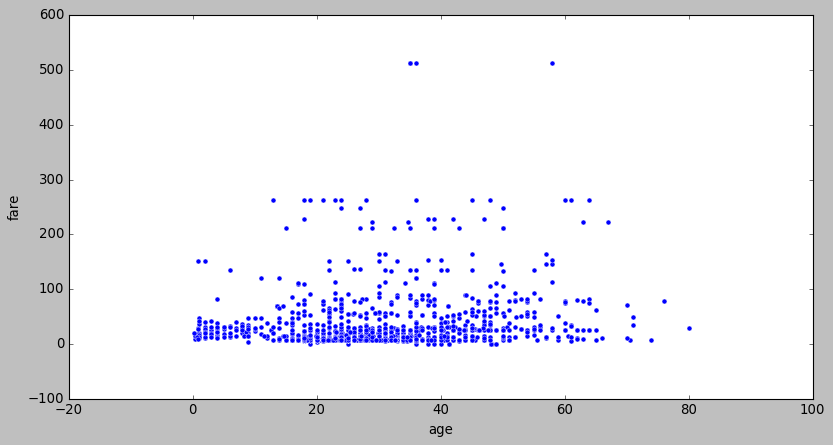

In [48]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x=titanic.age, y=titanic.fare);

#### Plot the correlation matrix using seaborn.

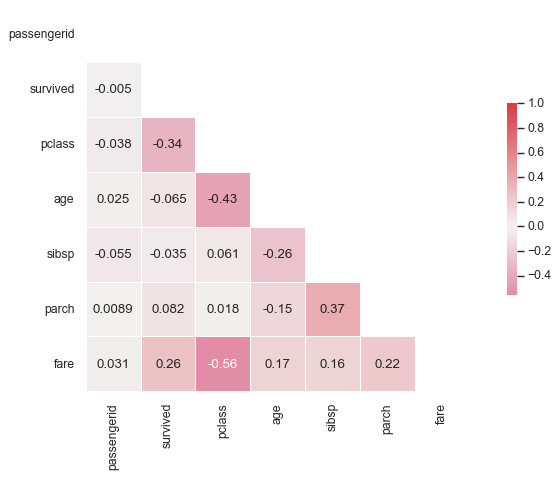

In [51]:
corr=titanic.corr(method='pearson')

sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

#### What are the most correlated features?

In [23]:
"""
no hay casi relación. 

La mayor relación seria el valor mas cercano a 1
"""

'\nno hay casi relación. \n\nLa mayor relación seria el valor mas cercano a 1\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

 #### Use la gráfica más apropiada para mostrar las estadísticas resumidas de `Age` dependiendo de `Pclass`.

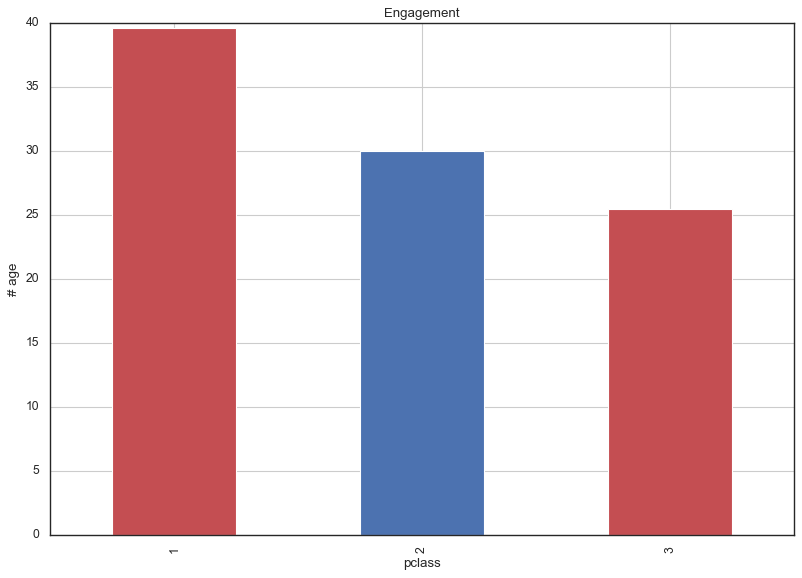

In [56]:
ax=titanic.groupby('pclass').mean().age.plot(
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 8),
        title='Engagement'
)
ax.set_xlabel('pclass')
ax.set_ylabel('# age')
plt.show();

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

 #### Use el maíz marino para trazar la distribución de `Age` en función del `Gender`. **Sugerencia **: Use Facetgrid.
 
  Use el maíz marino para trazar la distribución de la edad según el género. Sugerencia: Use Facetgrid.  Use el maíz marino para rastrear la distribución de Age en función del género. *Surencia *: Use Facetgrid.

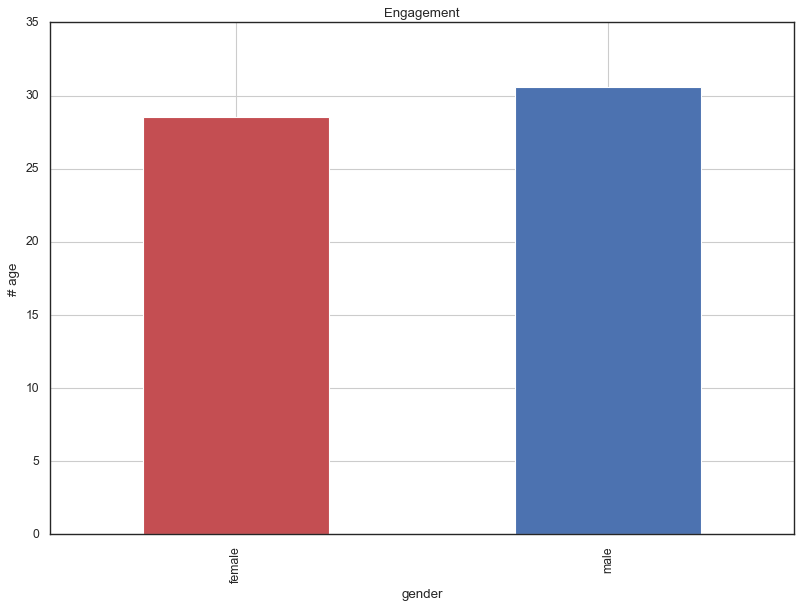

In [57]:
ax=titanic.groupby('gender').mean().age.plot(
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 8),
        title='Engagement'
)
ax.set_xlabel('gender')
ax.set_ylabel('# age')
plt.show();